In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis as scipy_kurtosis 

# Load Data

In [2]:
# Data Source: https://www.nordpoolgroup.com/historical-market-data/
file_path = 'https://www.nordpoolgroup.com/48cd48/globalassets/marketdata-excel-files/n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls'
##file_path = '../data/nordpool/n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls'

In [3]:
# Load
raw_list = pd.read_html(file_path, parse_dates=[0])
df = raw_list[0]

In [4]:
# Name Columns
df.columns = ['date','hour','hour_EU','price']

# Format Hour Columns
df.hour = df.hour.str.slice(stop = 2)
df.hour = pd.to_numeric(df.hour)
df.hour_EU = df.hour_EU.str.slice(stop = 2)
df.hour_EU = pd.to_numeric(df.hour_EU)

In [5]:
# Count NA values
df.isna().any(axis=1).sum()
#df.price.isna().sum()

1

In [6]:
# Drop NA values
df = df.dropna()

# Functions

In [7]:
def moment(arr, i: int):
    """Calculate the ith moment of array like input a"""
    
    moment = ((arr-arr.mean())**i).sum() / len(arr)
    
    return moment

In [8]:
def my_kurtosis(a):

    kurtosis = moment(a, 4) / moment(a, 2)**2
    
    return kurtosis

# Analyse

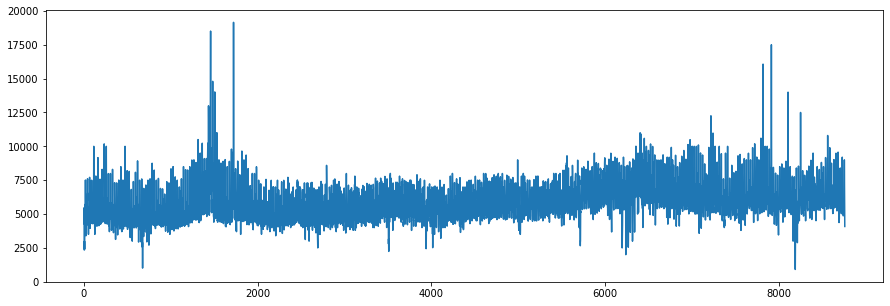

In [9]:
df.price.plot(figsize=[15,5])

# Moments

In [10]:
# Second Moment
moment(df.price, 2)

1719628.9118768245

In [11]:
# Variance is Second Moment
df.price.var()

1719825.2389588985

In [12]:
# Print the Moments
for i in range(0,7):
    print(f'Moment {i} is: {"{:.0e}".format(moment(df.price, i))}')

Moment 0 is: 1e+00
Moment 1 is: -3e-13
Moment 2 is: 2e+06
Moment 3 is: 3e+09
Moment 4 is: 2e+13
Moment 5 is: 2e+17
Moment 6 is: 2e+21


### Kurtosis

In [13]:
df.price.kurtosis()

5.410562356419496

In [14]:
scipy_kurtosis(df.price, bias=False)

5.410562356419497

In [15]:
scipy_kurtosis(df.price)

5.406789776080169

In [16]:
# Pearson Kurtosis
scipy_kurtosis(df.price, fisher=False)

8.406789776080169

In [17]:
# My Kurtosis Function
my_kurtosis(df.price)

8.406789776080169